In [1]:
include("./fitting.jl");
using ProgressMeter, LsqFit, GLM

In [2]:
N=100;
M=50;
L = 0.3;
### Temp params 
num_temps = 38;
Tr=273.15+10; Ed=3.5;

In [3]:
Temp_rich = range(0, num_temps-1, length = num_temps);
k = 0.0000862 # Boltzman constant
x = -1/k .* (1 ./(Temp_rich .+273.15) .- 1/Tr);
temp = collect(Temp_rich .+273.15);
temp_SS(T, params) = params[1] .* exp.((-params[2]./k) * ((1 ./T) .-(1/Tr)))./(1 .+ (params[2]./(params[4] .- params[2])) .* exp.(params[4]/k * (1 ./params[3] .- 1 ./T)));

### $\rho = -1$

In [4]:
@load "../data/1com-1.jld2" all_ℵii all_ℵij all_up_ℵij all_low_ℵij all_ℵij_sum all_D_ℵij all_ℵii_sur all_ℵij_sur all_up_ℵij_sur all_low_ℵij_sur all_ℵij_sum_sur all_D_ℵij_sur;
D = (all_ℵii = all_ℵii, all_ℵij = all_ℵij, all_up_ℵij = all_up_ℵij,all_low_ℵij = all_low_ℵij, all_ℵij_sum= all_ℵij_sum, all_D_ℵij = all_D_ℵij,
    all_ℵii_sur = all_ℵii_sur,  all_ℵij_sur = all_ℵij_sur, all_up_ℵij_sur = all_up_ℵij_sur, all_low_ℵij_sur = all_low_ℵij_sur, all_ℵij_sum_sur = all_ℵij_sum_sur, all_D_ℵij_sur = all_D_ℵij_sur);
Dnames = ("αii", "αij", "up_αij", "low_αij", "sum_αij", "up_low", "αii_sur", "αij_sur", "up_αij_sur", "low_αij_sur", "sum_αij_sur", "up_low_sur");


$\alpha_{ii}$

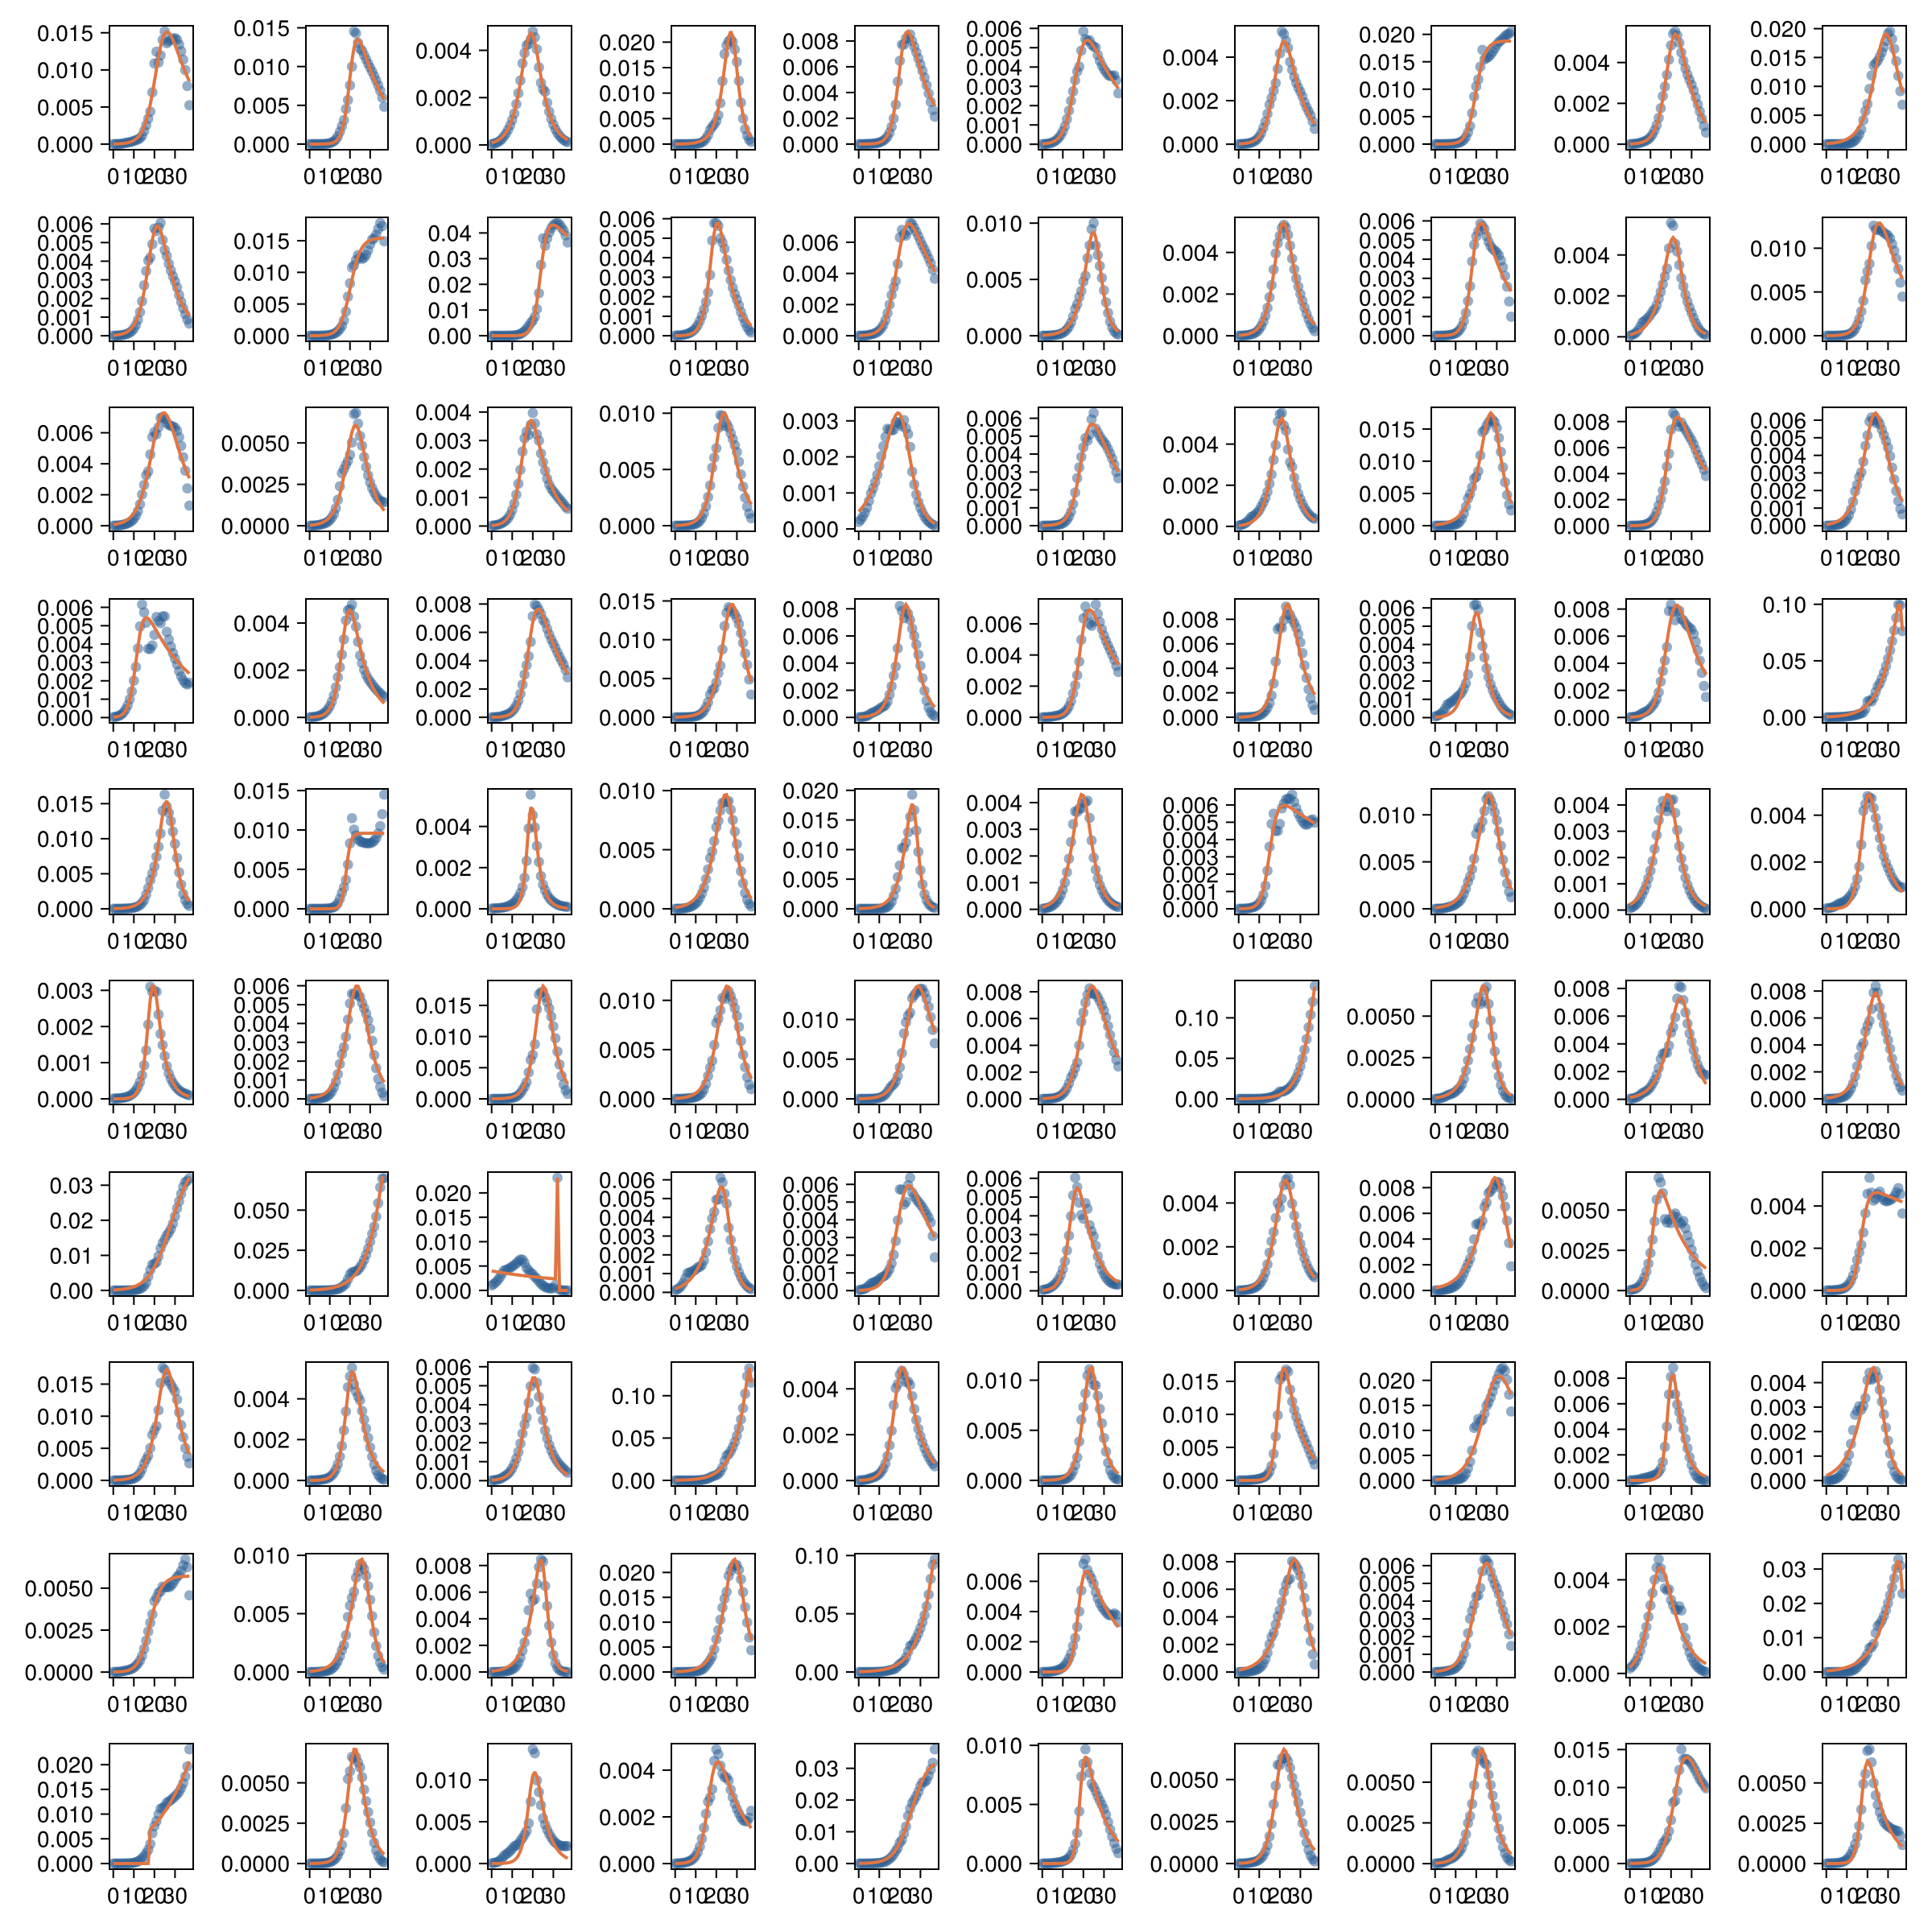

In [5]:
f1 = Figure(size = (1200, 1200));
fitted = CSV.read("../results/αii_fitted-1.csv", DataFrame, header=false)
temp = collect(Temp_rich .+273.15)
for i in 1:N 
    params = fitted[Int(i),1:4]
    αii = [all_ℵii[t][i] for t in 1:num_temps]
    pred = abs.(temp_SS(temp, params))
    ax1 = Axis(f1[Int(floor((i-1)/10+1)),Int((i-1) % 10+1)], ygridvisible = false, xgridvisible = false)
    scatter!(ax1, Temp_rich, abs.(αii), color = "#285C93", alpha = 0.5)
    lines!(ax1, Temp_rich, pred, color = ("#E17542", 1), linewidth = 2)
end 
display(f1);
# save("../results/TPCαii-1.png", f1) 


In [6]:
fitted = CSV.read("../results/αii_fitted-1.csv", DataFrame, header=false)
df_names = ["B0","E","Th","Ed","AIC","r2"]
fitted = DataFrame(fitted, df_names);
# fitted = fitted[fitted.r2 .> 0.9, :]
fitted = fitted[fitted.E .> eps(), :]
fitted = fitted[fitted.B0 .> eps(), :]
fitted = fitted[fitted.Ed .> eps(), :]
fitted = fitted[fitted.r2 .> 0.9, :]

println("mean_Bii = ", mean(log.(fitted.B0)),"\n", 
"var_Bii = ", var(log.(fitted.B0))/abs(mean(log.(fitted.B0))), "\n",
"mean_Eii = ", mean(fitted.E), "\n",
"var_Eii = ", var(fitted.E)/abs(mean(fitted.E)), "\n",
"cor_ii = ", cor(log.(fitted.B0), fitted.E), "\n",
"mean_Thii = ", mean(fitted.Th) - 273.15)


mean_Bii = -7.810692572877349
var_Bii = 0.12497349550851229
mean_Eii = 2.276992458209198
var_Eii = 0.38065203654984836
cor_ii = -0.9035411042498734
mean_Thii = 24.184002173195665


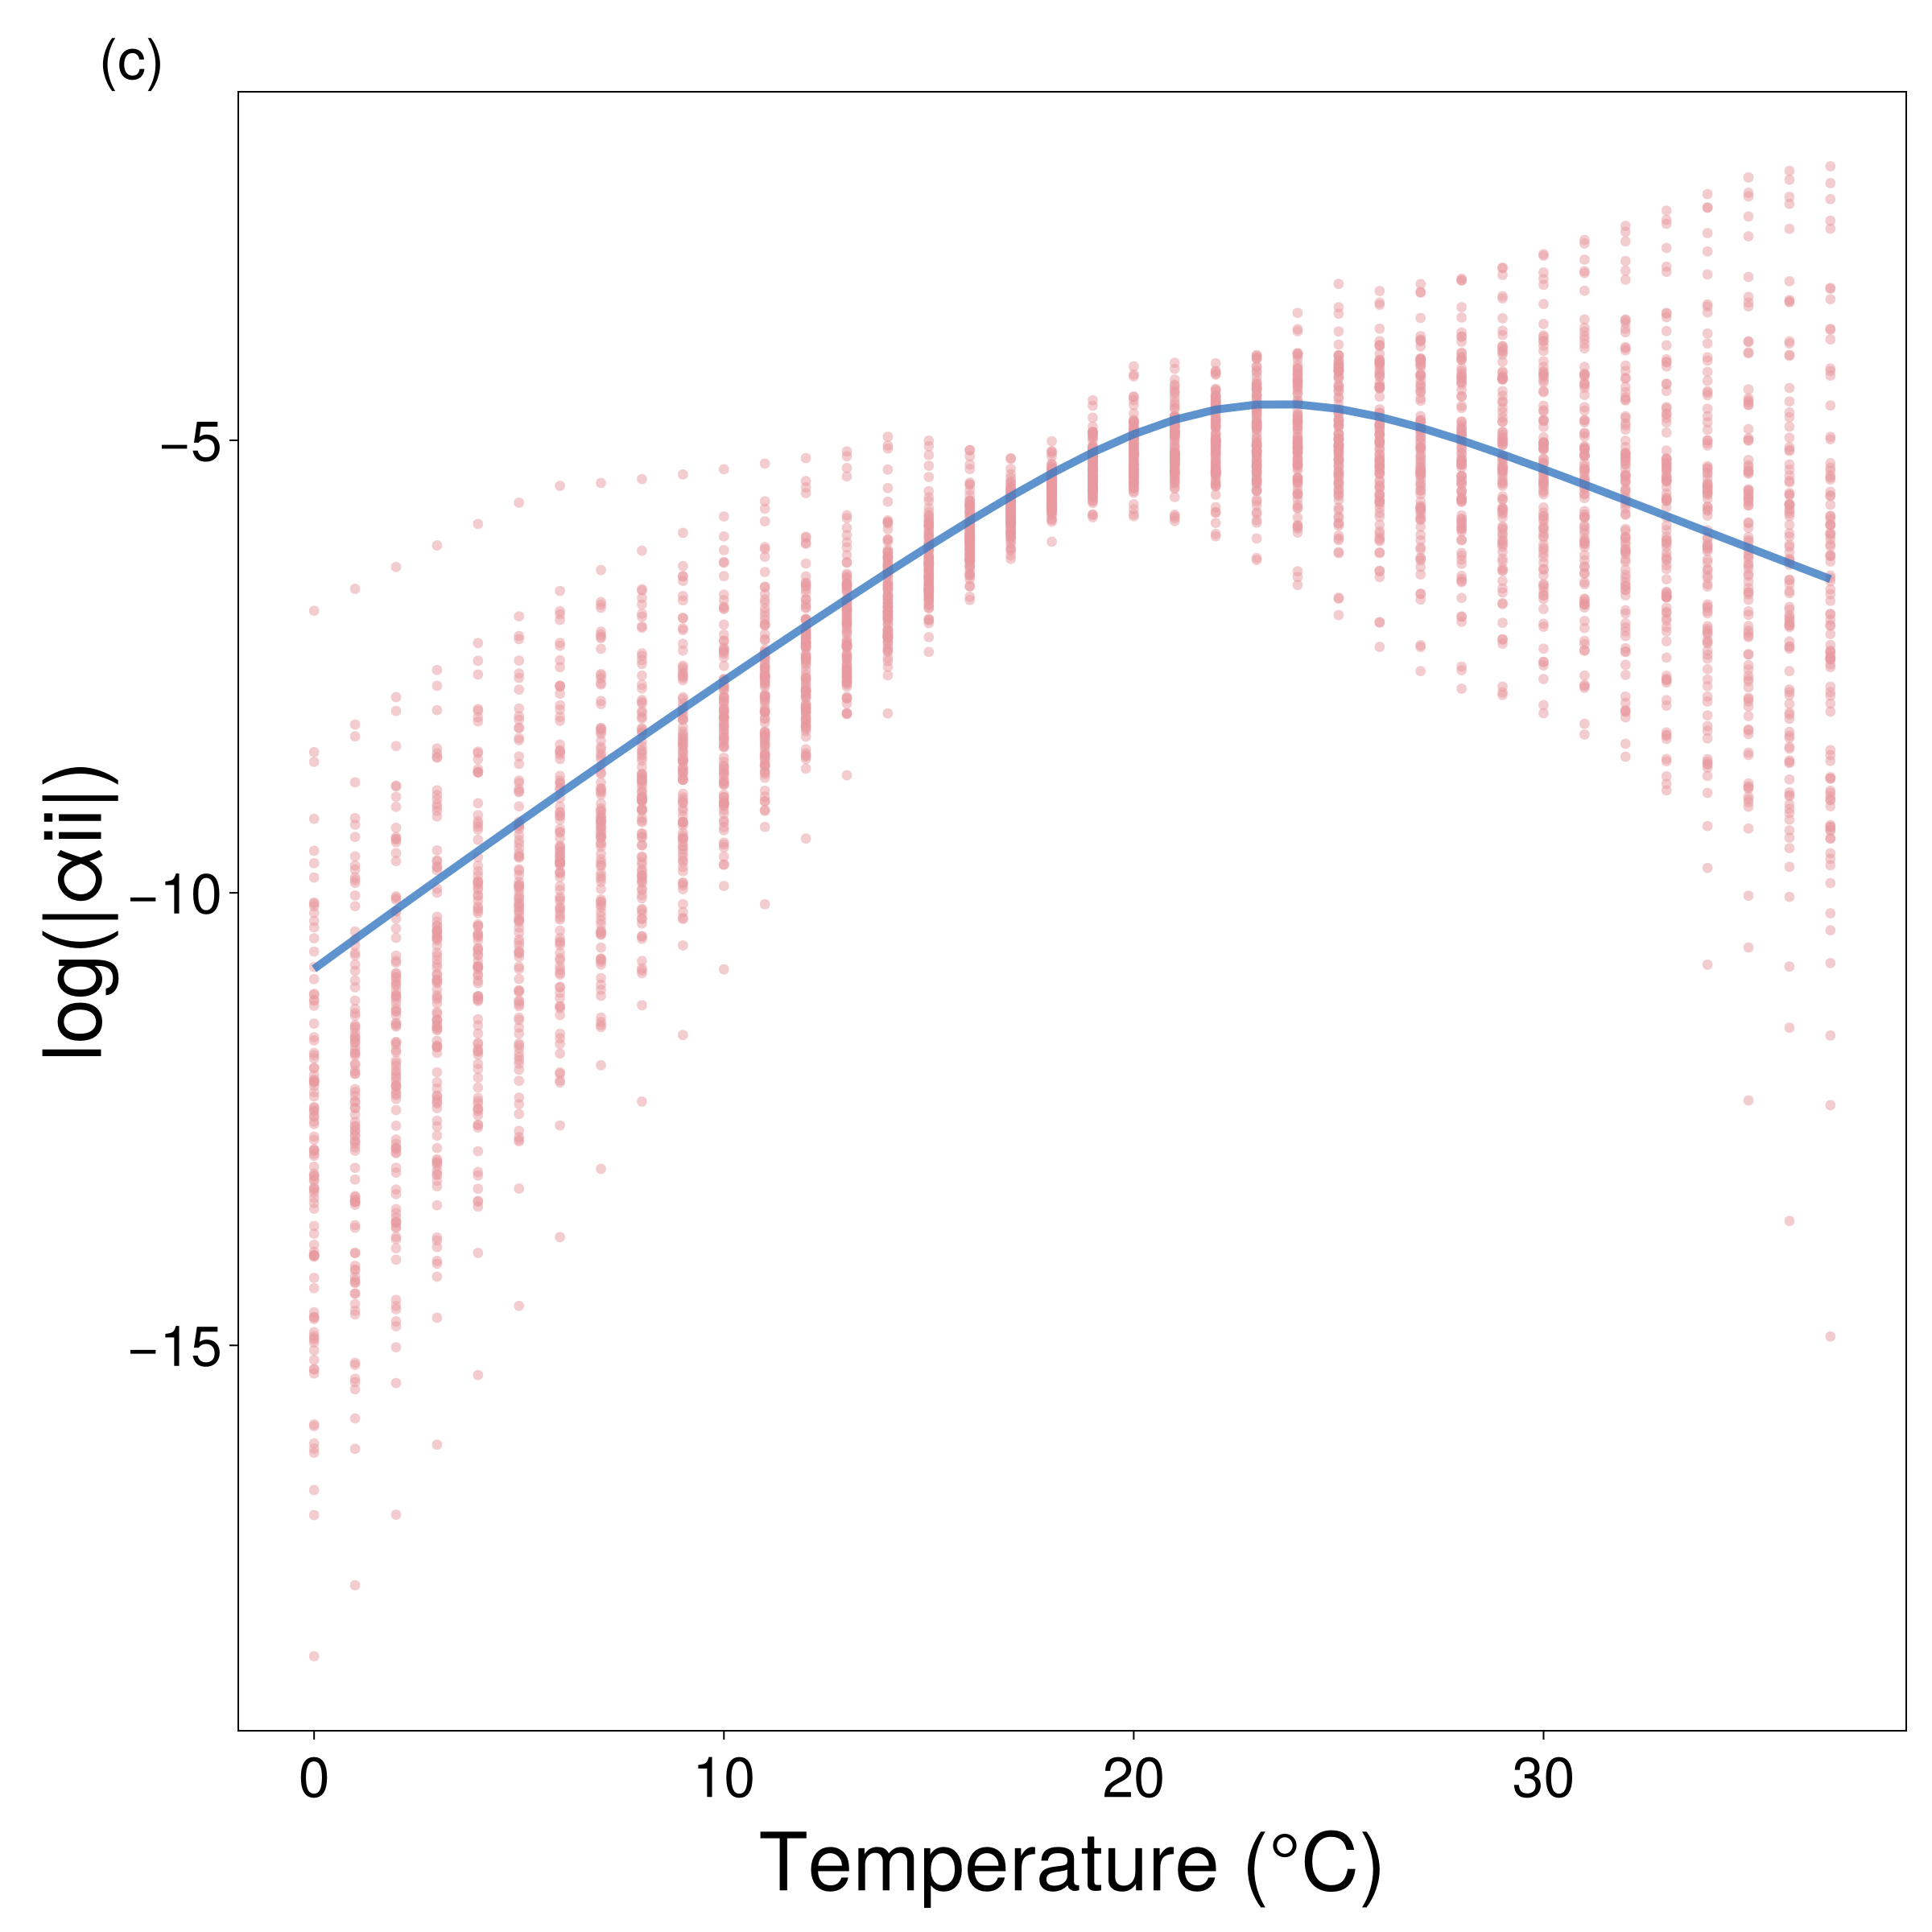

CairoMakie.Screen{IMAGE}


In [7]:
allα = abs.(vcat(all_ℵii...))
temp_all = vcat([repeat([temp[t]], length(all_ℵii[t])) for t in 1:num_temps]...)
params = [exp(median(log.(fitted.B0))), median(fitted.E), median(fitted.Th), median(fitted.Ed)]
pred = abs.(temp_SS(temp, params))

f = Figure(fontsize = 35,size = (1200, 1200));
ax = Axis(f[1,1], xlabel = "Temperature (°C)", ylabel = "log(|αii|)", ygridvisible = false, xgridvisible = false, xlabelsize = 50, ylabelsize = 50)
scatter!(ax, temp_all .- 273.15, log.(abs.(allα)), color = "#E99BA1", alpha = 0.5)
lines!(ax, Temp_rich, log.(pred), color = ("#3878C1", 0.8), linewidth = 5)
# for i in 1: nrow(fitted)
#     lines!(ax, Temp_rich, log.(pred[i]), color = ("#E17542", 0.7), linewidth = 0.7)
# end 
# text!(10, -4.5, text = "mean(E) = $(round(mean(fitted.E),digits  =3))", align = (:center, :center), fontsize = 35)
Label(f[1,1, TopLeft()], "(c)")

display(f)
save("../results/TPCαii-1_all.png", f) 


$\sum_j \alpha_{ij}$

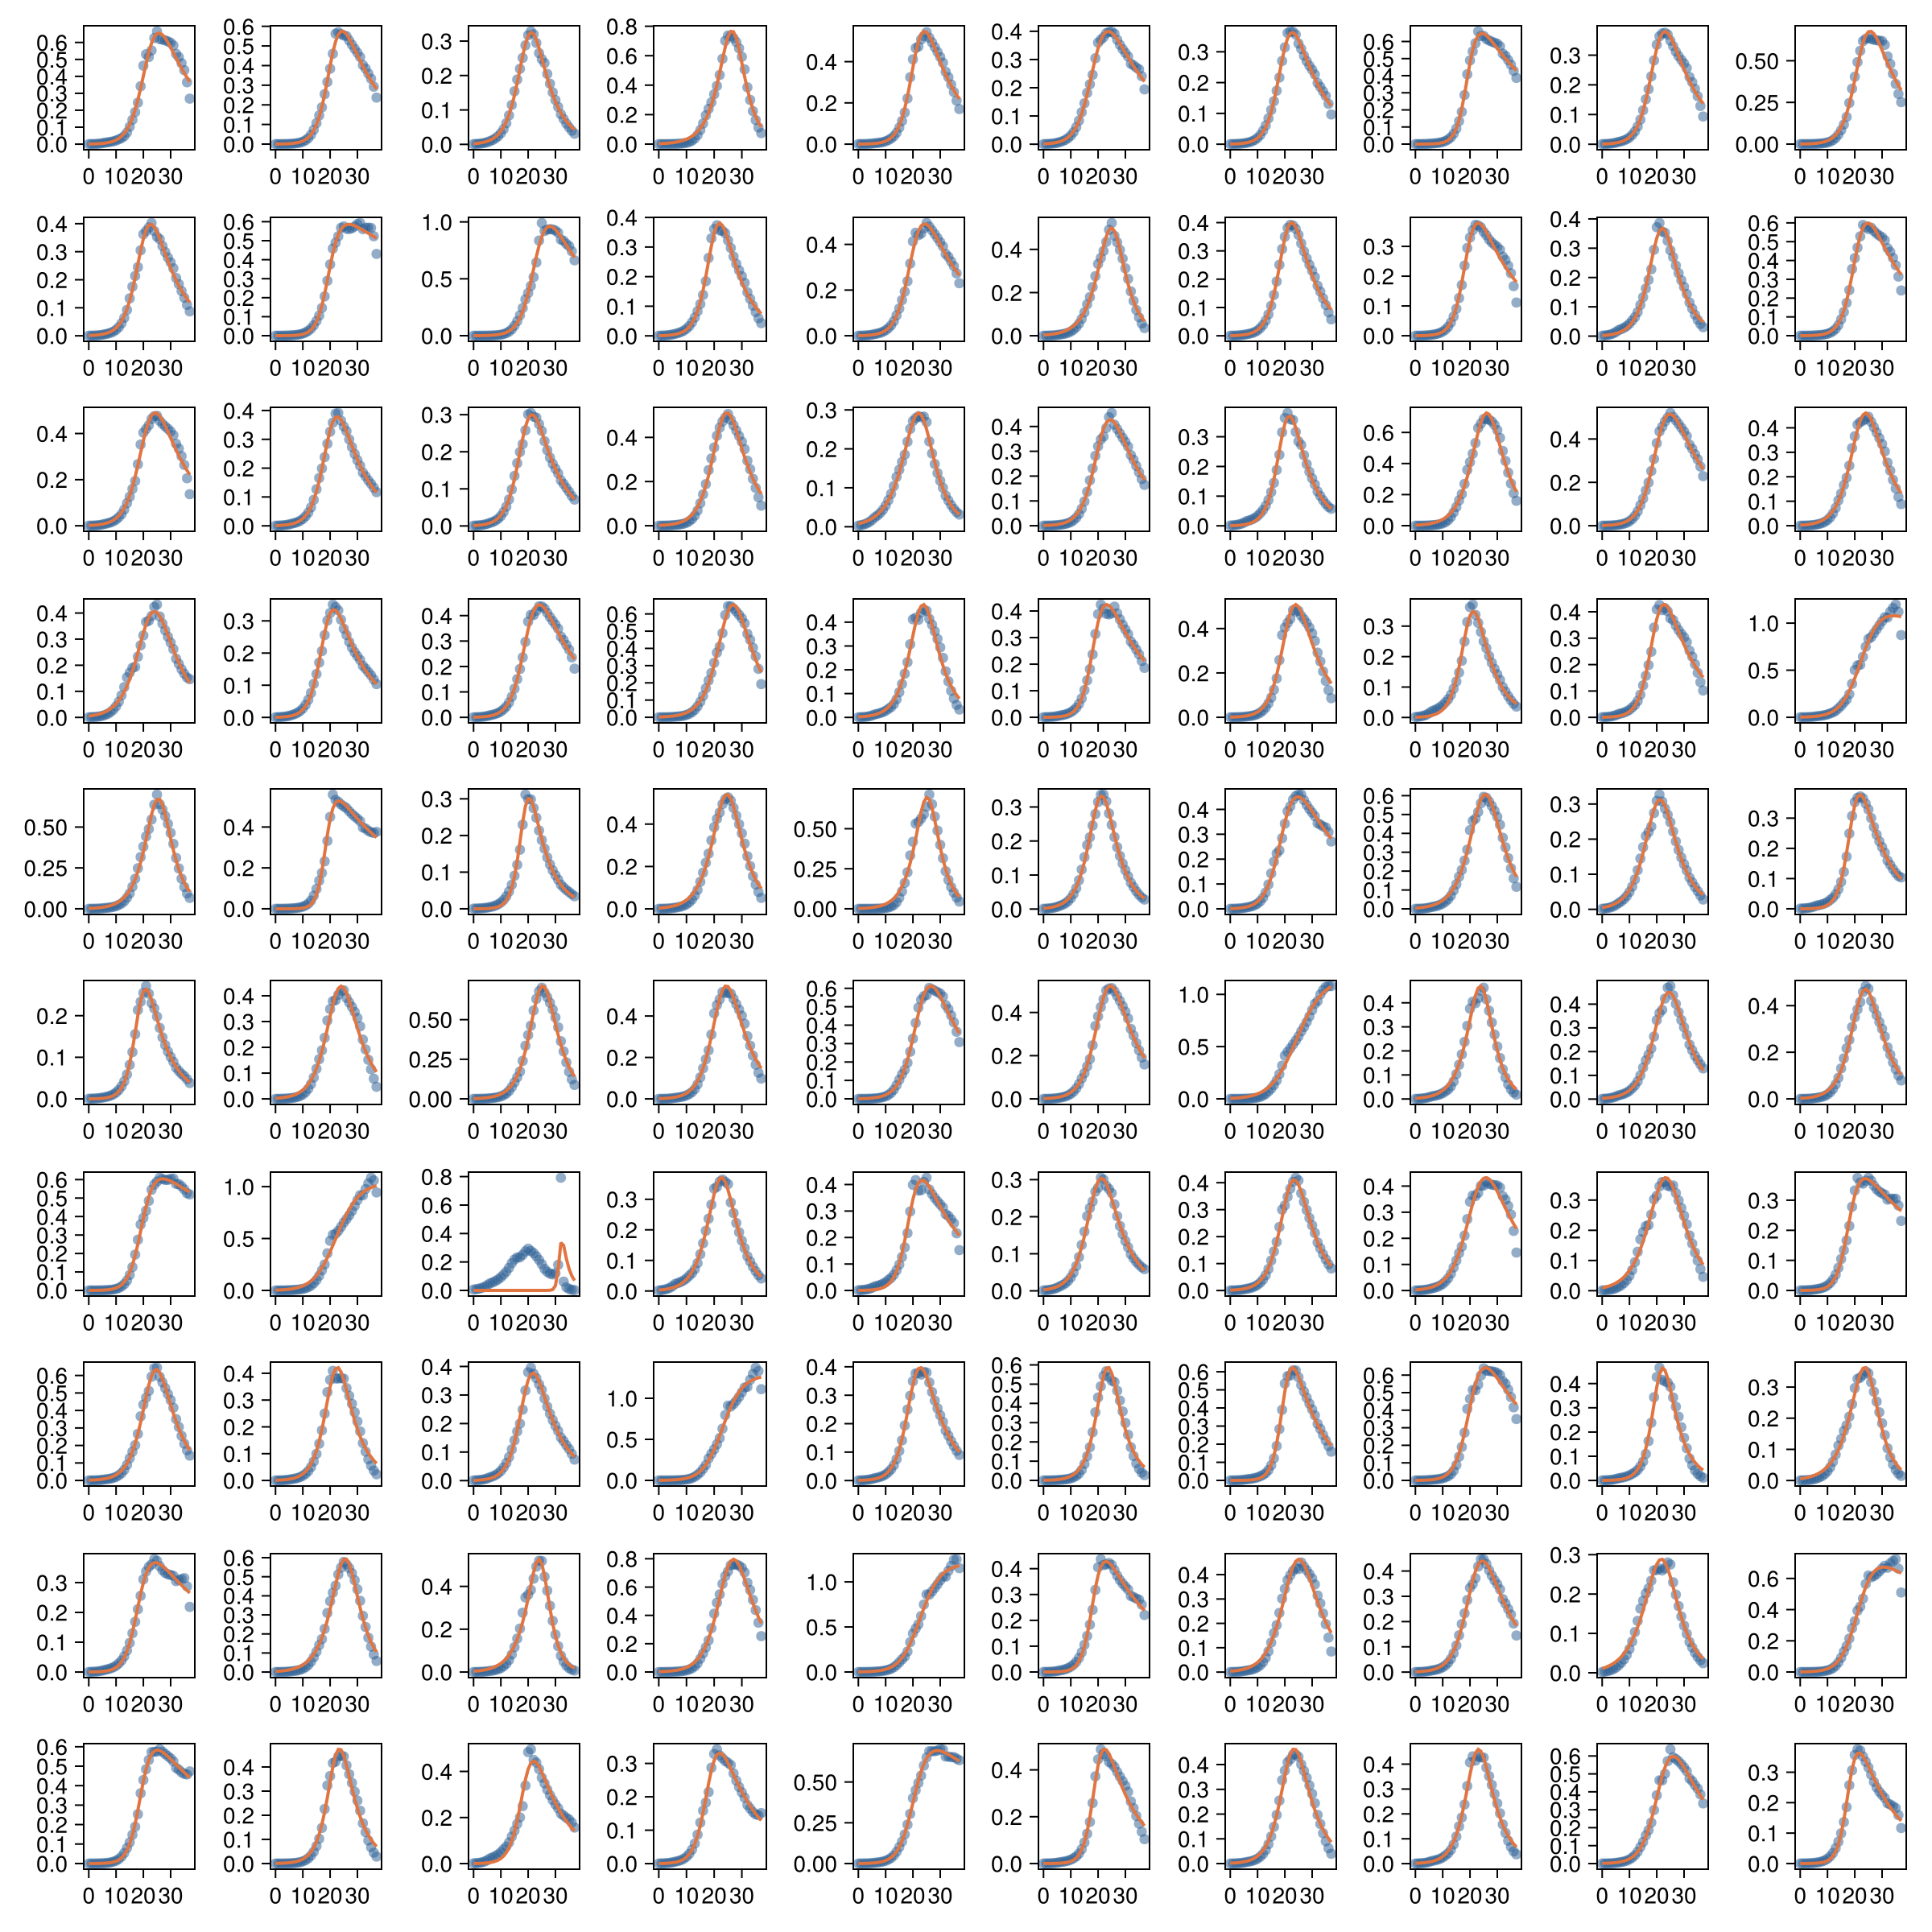

In [8]:
f2 = Figure(size = (1200, 1200));
fitted = CSV.read("../results/αij_sum_fitted-1.csv", DataFrame, header=false)
temp = collect(Temp_rich .+273.15)
for i in 1:N 
    params = fitted[Int(i),1:4]
    αij = [all_ℵij_sum[t][i] for t in 1:num_temps]
    pred = abs.(temp_SS(temp, params))
    ax2 = Axis(f2[Int(floor((i-1)/10+1)),Int((i-1) % 10+1)], ygridvisible = false, xgridvisible = false)
    scatter!(ax2, Temp_rich, abs.(αij), color = "#285C93", alpha = 0.5)
    lines!(ax2, Temp_rich, pred, color = ("#E17542", 1), linewidth = 2)
end 
display(f2);
# save("../results/TPCαij_sum-1.png", f2) 


In [9]:
fitted_all = CSV.read("../results/αij_fitted_all-1.csv", DataFrame, header=false)
df_names = ["B0","E","Th","Ed","AIC","r2"]
fitted_all = DataFrame(fitted_all, df_names);
fitted_all = fitted_all[fitted_all.B0 .> eps(), :]
fitted_all = fitted_all[fitted_all.E .> eps(), :]
fitted_all = fitted_all[fitted_all.Ed .> eps(), :]
fitted_all = fitted_all[fitted_all.r2 .> 0.9, :]

println("mean_Bij = ", mean(log.(fitted_all.B0)),"\n", 
"var_Bij = ", var(log.(fitted_all.B0))/abs(mean(log.(fitted_all.B0))), "\n",
"mean_Eij = ", mean(fitted_all.E), "\n",
"var_Eij = ", var(fitted_all.E)/abs(mean(fitted_all.E)), "\n",
"cor_ij = ", cor(log.(fitted_all.B0), fitted_all.E), "\n",
"mean_Thij = ", mean(fitted_all.Th)-273.15)

mean_Bij = -8.335465299621303
var_Bij = 0.06885041383545865
mean_Eij = 2.2623690292358125
var_Eij = 0.27349420078432163
cor_ij = -0.9433042946795921
mean_Thij = 23.920469615664615


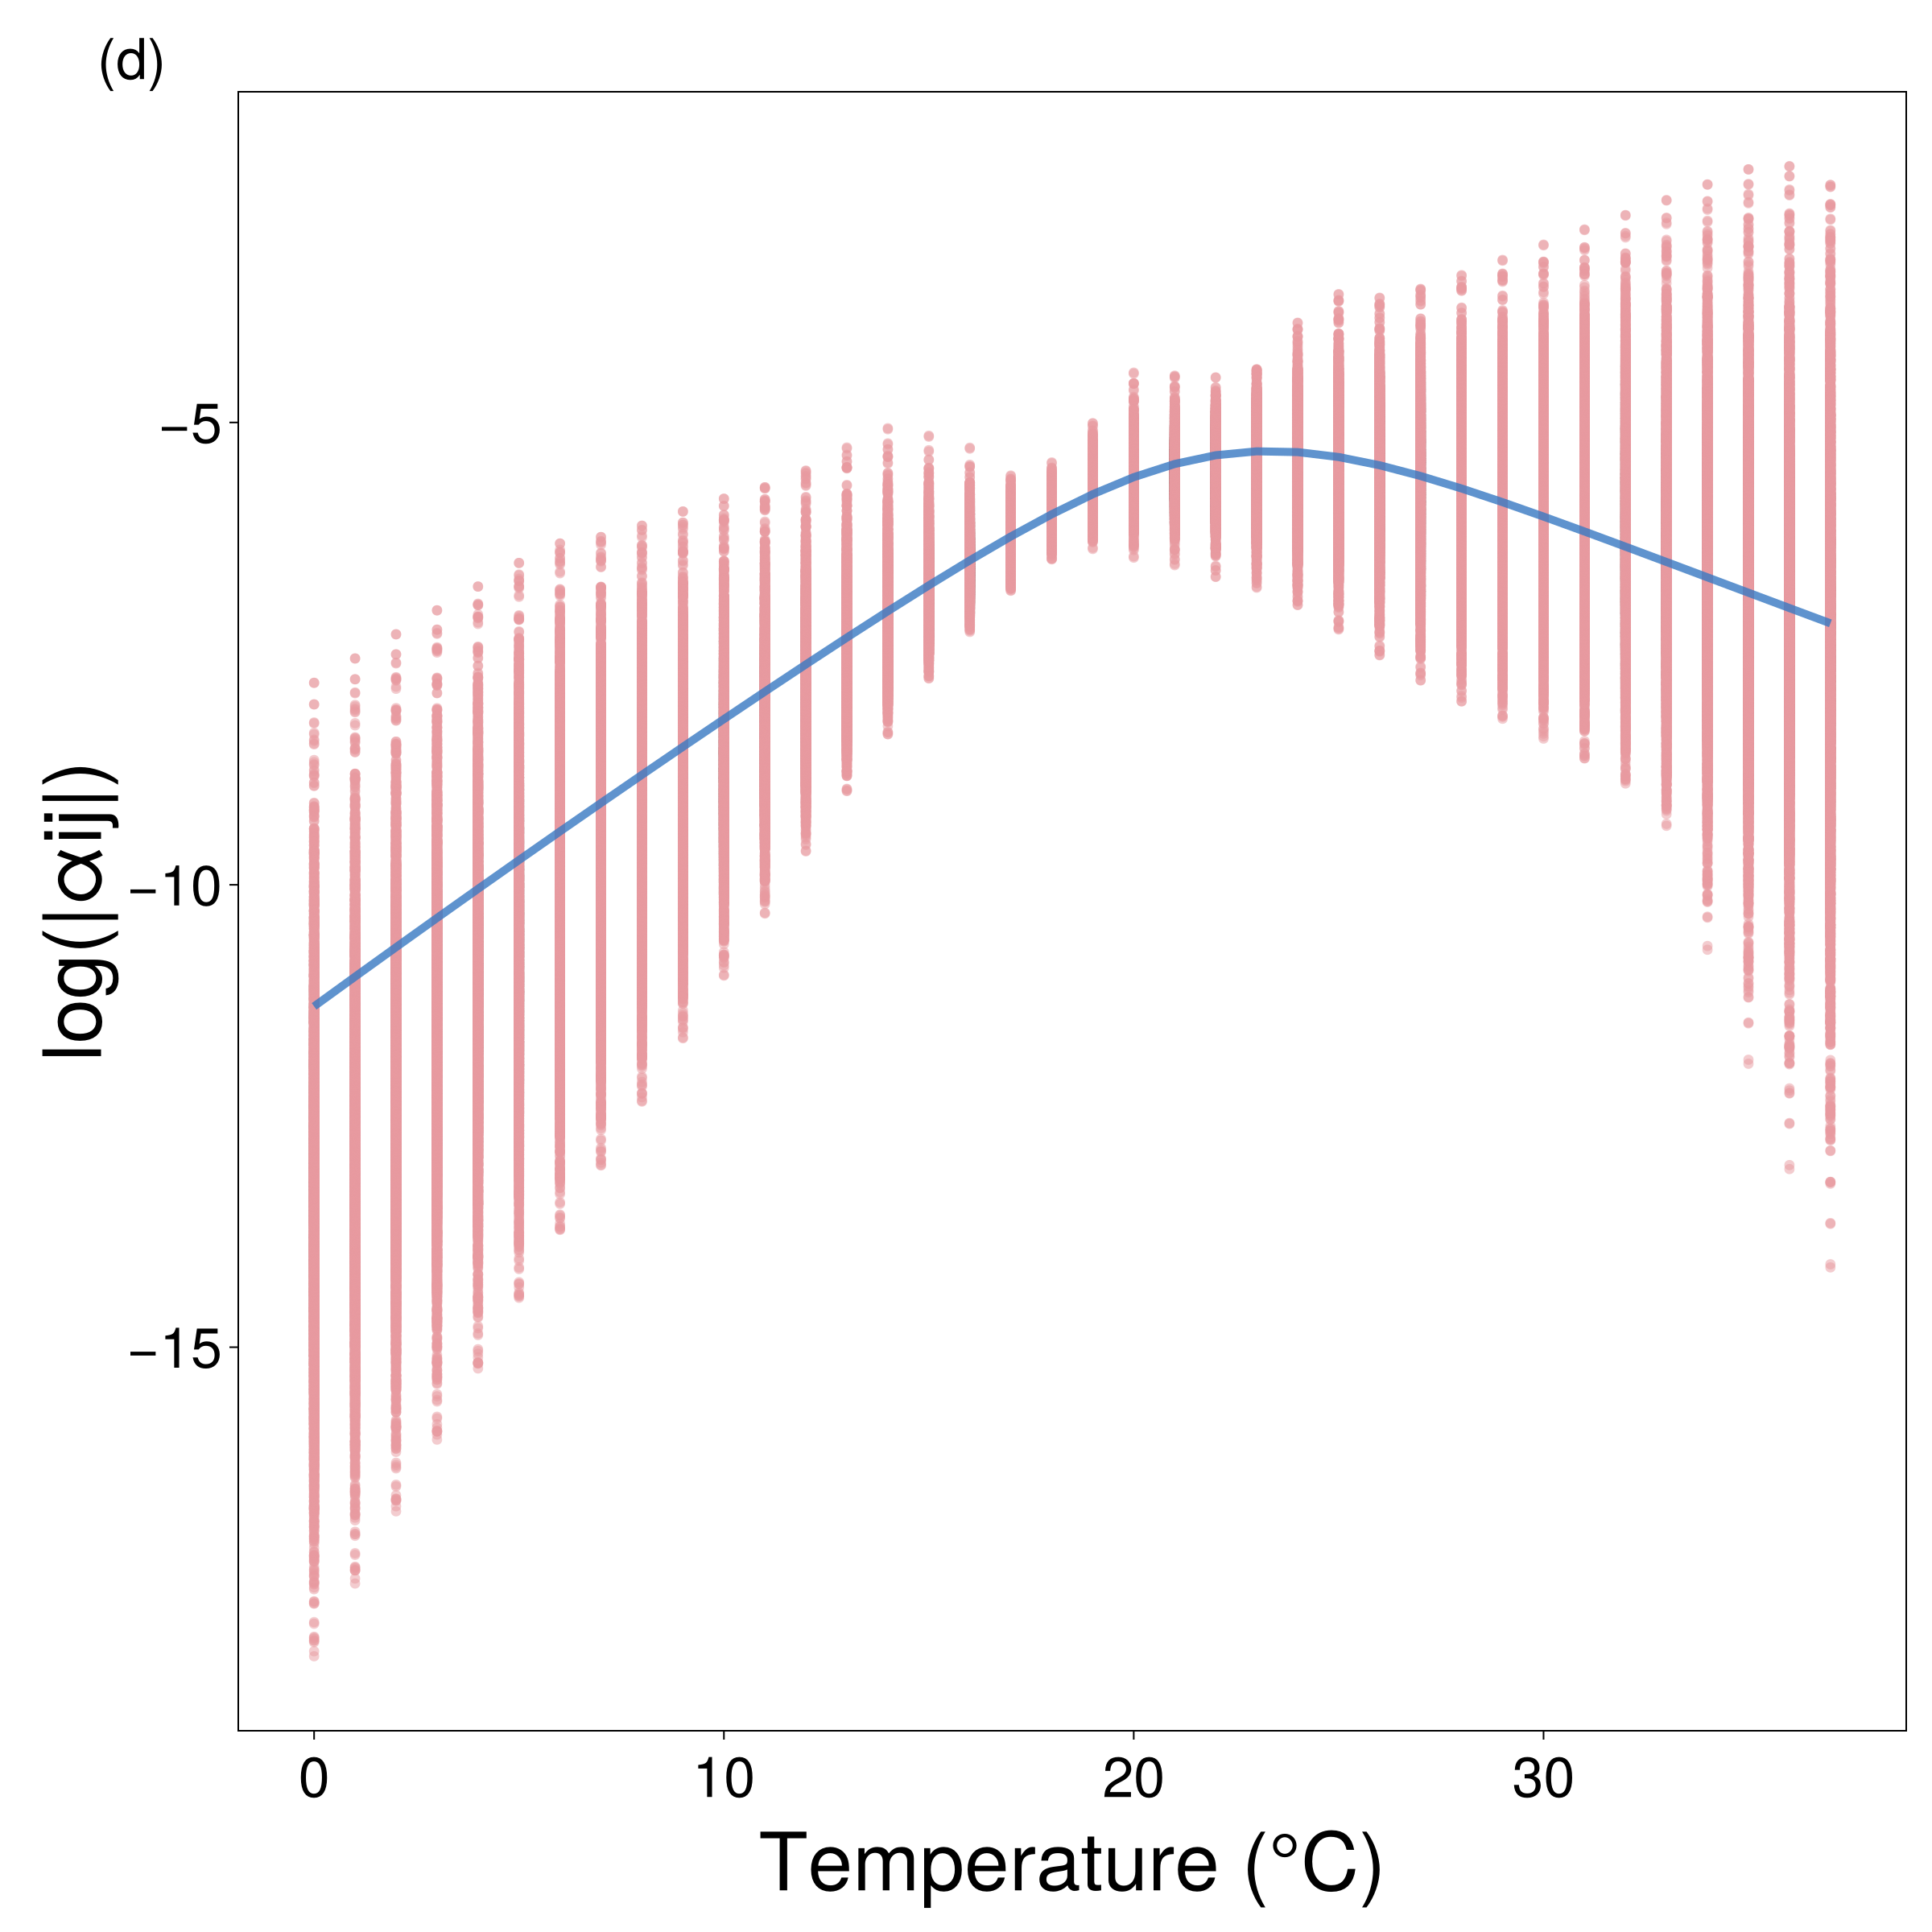

In [ ]:
allα = abs.(vcat(all_ℵij...))
temp_all = vcat([repeat([temp[t]], length(all_ℵij[t])) for t in 1:num_temps]...)
params = [exp(median(log.(fitted_all.B0))), median(fitted_all.E), median(fitted_all.Th), median(fitted_all.Ed)]
pred = abs.(temp_SS(temp, params))

f = Figure(fontsize = 35,size = (1200, 1200));
ax = Axis(f[1,1], xlabel = "Temperature (°C)", ylabel = "log(|αij|)", ygridvisible = false, xgridvisible = false, xlabelsize = 50, ylabelsize = 50)
scatter!(ax, temp_all .- 273.15, log.(abs.(allα)), color = "#E99BA1", alpha = 0.5)
lines!(ax, Temp_rich, log.(pred), color = ("#3878C1", 0.8), linewidth = 5)
# text!(10, -4.5, text = "mean(E) = $(round(mean(fitted_all.E),digits  =3))", align = (:center, :center), fontsize = 35)
Label(f[1,1, TopLeft()], "(d)")

display(f)

save("../results/TPCαij-1.png", f) 


### Upper diagonal/ Lower diagonal


In [ ]:
allα = abs.(vcat(all_D_ℵij...));
temp_all = vcat([repeat([temp[t]], length(all_D_ℵij[t])) for t in 1:num_temps]...);


In [ ]:
f = Figure(fontsize = 35,size = (1200, 1200));
ax = Axis(f[1,1], xlabel = "Temperature (°C)", ylabel = "upper/lower (log)", ygridvisible = false, xgridvisible = false, xlabelsize = 50, ylabelsize = 50)
boxplot!(ax, temp_all.-273.15, log.(abs.(allα)), color = ("#285C93", 0.8))
display(f);
# save("../results/upper_lower-1.png", f) 

In [ ]:
f = Figure(fontsize = 35,size = (1200, 1200));
ax = Axis(f[1,1], xlabel = "upper/lower (log)", ylabel = "frequency", ygridvisible = false, xgridvisible = false, xlabelsize = 50, ylabelsize = 50)
hist!(ax, log.(abs.(allα)), bins = 100, color = ("#285C93", 0.8))
display(f);
save("../results/UL_hist-1.png", f) 

In [ ]:
mean(log.(abs.(allα)))

In [ ]:
var(log.(abs.(allα)))